In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

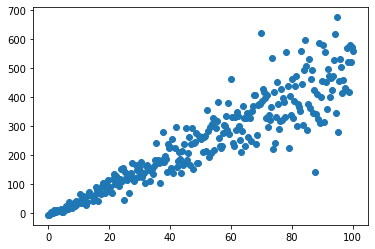

<class 'pandas.core.frame.DataFrame'>


In [2]:

hetero = pd.read_csv("heteroscedastic.csv")

plt.scatter(hetero['x'],hetero['y'])
plt.show()

print(type(hetero))

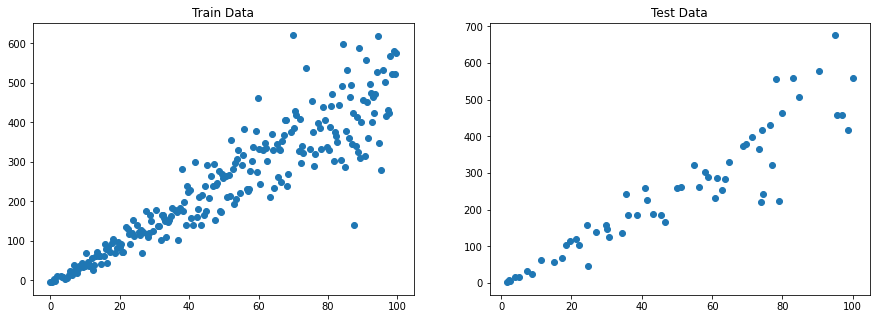

In [3]:


train, test = train_test_split(hetero, test_size=.2,random_state=0)
fig, ax = plt.subplots(1,2, figsize=(15, 5))
ax[0].scatter(train['x'],train['y'])
ax[0].set_title("Train Data")

ax[1].scatter(test['x'],test['y'])
ax[1].set_title("Test Data")
plt.show()


In [4]:
def pynomial_regression (data,degree,lr):
  x_train = data.iloc[:,0:1].values # to acess all rows and and first colum [[]]
  # print(x_train)
  y_train = data.iloc[:,1:].values
 
  # print(y_train)
  
  p = PolynomialFeatures(degree=degree) # make x**4 + x**3 + x**2 + x + x
  xpynomial = p.fit_transform(x_train)
  lr.fit(xpynomial,y_train) # training phase 

  y_predicted = lr.predict(xpynomial)
  return x_train,y_train,y_predicted,xpynomial

In [5]:



dff = pd.DataFrame(hetero, columns = ['x','y'])
train=dff.sample(n=5)
train_sorted=train.sort_values("x")
lr = LinearRegression()

x_train,y_train,y_predicted,xpynomial=pynomial_regression(train_sorted,4,lr)



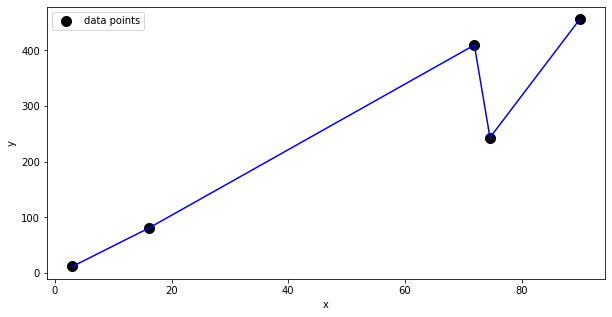

In [6]:

plt.figure(figsize=(10,5))
plt.plot(x_train,y_predicted,c='blue')
plt.scatter(x_train,y_train,s=100,c='black', label='data points')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

In [7]:
rmse = np.sqrt(mean_squared_error(y_train,y_predicted))
print("RMSE "+str(rmse))

RMSE 4.433141944093014e-07


In [30]:
x_test = test.iloc[:,0:1].values 
y_test = test.iloc[:,1:].values

# Try to reduce overfiting by LASSO Regularization Technique

57.37765446399827


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.265e+03, tolerance: 1.529e+01
  model = cd_fast.enet_coordinate_descent(


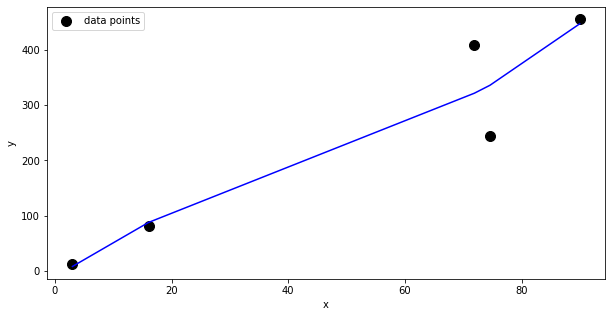

In [8]:
def pynomial_lasso(x_train,y_train,xpynomial):
    

    lasso.fit(xpynomial,y_train)
    
    # y_range= lasso.intercept_ + np.sum(lasso.coef_ * xvalues, axis = 1)
    y_pred= lasso.predict(xpynomial)
    
    
    return  y_pred

lasso = Lasso()

y_pred_lasso=pynomial_lasso(x_train,y_train,xpynomial)

rmse_lasso=np.sqrt(mean_squared_error(y_pred_lasso,y_train))
print(rmse_lasso)
plt.figure(figsize=(10,5))
plt.plot(x_train,y_pred_lasso,c='blue')
plt.scatter(x_train,y_train,s=100,c='black', label='data points')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()




```
```

# Monotonic

---



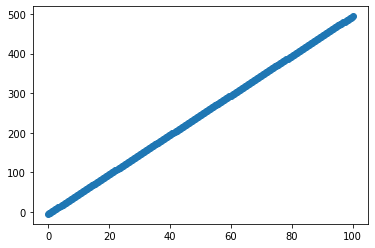

In [40]:
monotonic=pd.read_csv('/content/Monotonic.csv')
plt.scatter(monotonic['x'],monotonic['y'])
plt.show()


0.13333333333333333


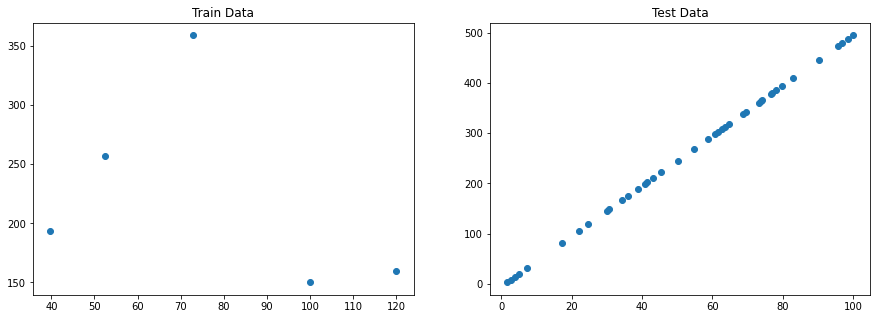

In [41]:
# import pandas as pd
# import numpy as np 
# mu, sigma = 0, 0.1 
# # creating a noise with the same dimension as the dataset (300,2) 
# noise = np.random.normal(mu, sigma, [300,2]) 
# monotonic = monotonic + noise
sample = 40
n = monotonic.shape[0]
rate = sample / n
print(rate)


train, test = train_test_split(monotonic, test_size=rate,random_state=0)




dff = pd.DataFrame(monotonic, columns = ['x','y'])
train=dff.sample(n=3)
df1 = pd.DataFrame({"x":[100, 120],
                    "y":[150, 160]})
train=train.append(df1, ignore_index = True)


# s = np.array(test)
# # change values
# s[2][1]=50
# s[3][0]= 150
# back to pd dataframe

# test = pd.DataFrame(s, columns = ['x','y'])
fig, ax = plt.subplots(1,2, figsize=(15, 5))
ax[0].scatter(train['x'],train['y'])
ax[0].set_title("Train Data")

ax[1].scatter(test['x'],test['y'])
ax[1].set_title("Test Data")
plt.show()

In [43]:
lr = LinearRegression()
# x_train,y_train,y_predicted=pynomial_regression(train_sorted,4,lr)


# train_sorted=train.sort_values("x")
x_train,y_train,y_predicted,xpynomial = pynomial_regression(train, 4,lr)

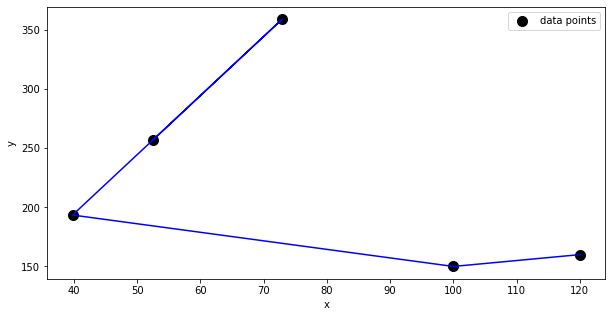

In [44]:

plt.figure(figsize=(10,5))
plt.plot(x_train,y_predicted,c='blue')
plt.scatter(x_train,y_train,s=100,c='black', label='data points')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

In [45]:

rmse = np.sqrt(mean_squared_error(y_train,y_predicted))
print("RMSE "+str(rmse))


RMSE 1.6459116368198585e-06


In [46]:
def pynomial_lasso(y_train,xpynomial):
    
    
    lasso.fit(xpynomial,y_train)

    
    y_pred= lasso.predict(xpynomial)
    
    
    return  y_pred

lasso = Lasso()

y_pred_lasso=pynomial_lasso(y_train,xpynomial)

rmse_lasso=np.sqrt(mean_squared_error(y_pred_lasso,y_train))
print(rmse_lasso)

37.56353043548944


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.659e+03, tolerance: 2.983e+00
  model = cd_fast.enet_coordinate_descent(
